# Playground for Classification Slides

- Stephen W. Thomas
- Used for Exec Ed
- The Easy version - no hard dependencies or packages (but also, less pretty)

In [190]:
import datetime
print(datetime.datetime.now())

2020-03-05 13:04:20.147582


In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

import itertools
import scipy

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [192]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.21.2.


In [ ]:
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import roc_curve, auc

# Adopted from: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html


def plot_boundaries(X_train, y_train, clf, clf_name, ax, hide_ticks=True):
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02));


    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]);
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1];

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8);


    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cm_bright, edgecolors='k', alpha=0.6);
    
    for i,j in zip(X[:, 0], X[:, 1]):
        ax.annotate(str("{}, {}".format(i, j)),xy=(i,j))
        

    ax.set_xlim(xx.min(), xx.max());
    ax.set_ylim(yy.min(), yy.max());
    if hide_ticks:
        ax.set_xticks(());
        ax.set_yticks(());
    else:
        ax.tick_params(axis='both', which='major', labelsize=18)
        #ax.yticks(fontsize=18);
        
    ax.set_title(clf_name, fontsize=28);
    
    

def plot_roc(clf, X_test, y_test, name, ax, show_thresholds=True):
    y_pred_rf = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thr = roc_curve(y_test, y_pred_rf)

    ax.plot([0, 1], [0, 1], 'k--');
    ax.plot(fpr, tpr, label='{}, AUC={:.2f}'.format(name, auc(fpr, tpr)));
    ax.scatter(fpr, tpr);

    if show_thresholds:
        for i, th in enumerate(thr):
            ax.text(x=fpr[i], y=tpr[i], s="{:.2f}".format(th), fontsize=14, 
                     horizontalalignment='left', verticalalignment='top', color='black',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.1));
        
    ax.set_xlabel('False positive rate', fontsize=18);
    ax.set_ylabel('True positive rate', fontsize=18);
    ax.tick_params(axis='both', which='major', labelsize=18);
    ax.grid(True);
    ax.set_title('ROC Curve', fontsize=18)
    

In [193]:
# Create the 'out' directory to store output images
import os
if not os.path.exists('out'):
    os.makedirs('out')

# Load Data

In [264]:
base = "C:\\Users\\st50\\OneDrive - Queen's University\\Courses\\202003_ExecEdAI\\Slides\\"
file = "Classification.csv"
df = pd.read_csv(base + file)

df['Paid Back'] = df['Paid Back'].replace(('yes', 'no'), (True, False)).astype('bool')

X = df[['Age', 'Income']].to_numpy()
y = df['Paid Back'].to_numpy()

suzy = np.array([[30., 59.]])
suzy.reshape(1, -1)

X.shape
type(X)
X
X[0,:]
y.shape
type(y)
y
suzy.shape
type(suzy)
suzy

array([[30., 59.]])

(28, 2)

numpy.ndarray

array([[31. , 49. ],
       [33. , 44. ],
       [33. , 41. ],
       [35. , 39. ],
       [40. , 32. ],
       [44. , 29. ],
       [50. , 24. ],
       [50. , 20. ],
       [54. , 23. ],
       [55. , 18. ],
       [26. , 24. ],
       [32. , 32. ],
       [42. , 34. ],
       [39. , 30. ],
       [29. , 48.7],
       [32. , 71. ],
       [34. , 65. ],
       [37. , 56. ],
       [39. , 66. ],
       [44. , 62. ],
       [48. , 51. ],
       [49. , 57. ],
       [51. , 34. ],
       [45. , 45. ],
       [46. , 36. ],
       [55. , 49. ],
       [42. , 55. ],
       [27. , 60. ]])

array([31., 49.])

(28,)

numpy.ndarray

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

(1, 2)

numpy.ndarray

array([[30., 59.]])

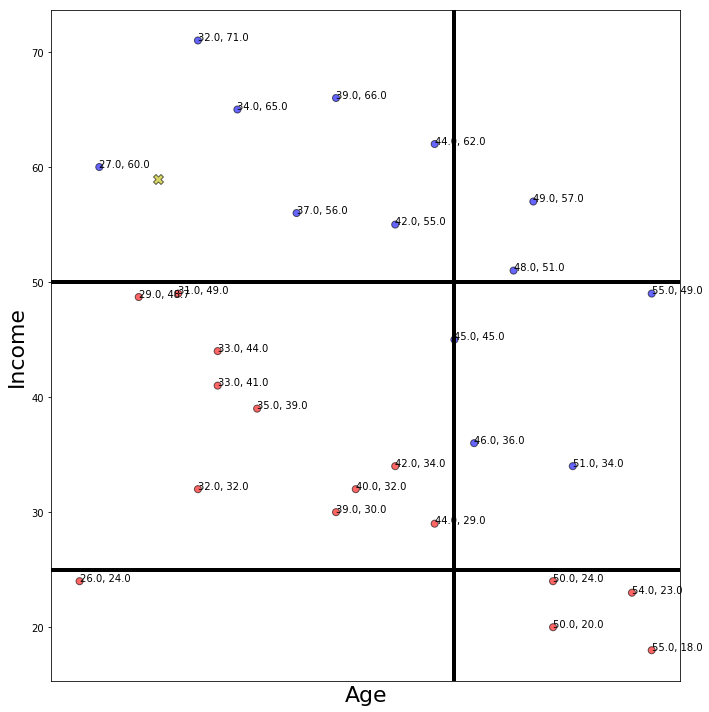

In [279]:
figure = plt.figure(figsize=(10, 10));
ax = plt.subplot(1, 1, 1);

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
# Plot the training points
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cm_bright, edgecolors='k', alpha=0.6);
ax.set_xticks(());
ax.set_xlabel("Age", fontsize=22)
ax.set_ylabel("Income", fontsize=22)

for i,j in zip(X[:, 0], X[:, 1]):
    ax.annotate(str("{}, {}".format(i, j)),xy=(i,j))

ax.axhline(50, 0, 100, linewidth=4, color='k')
ax.axhline(25, 0, 100, linewidth=4, color='k')
ax.axvline(45, 0, 100, linewidth=4, color='k')
ax.scatter(suzy[:, 0], suzy[:, 1], c='y', marker='X', s=100, edgecolors='k', alpha=0.6);
plt.tight_layout();

# Decision Trees

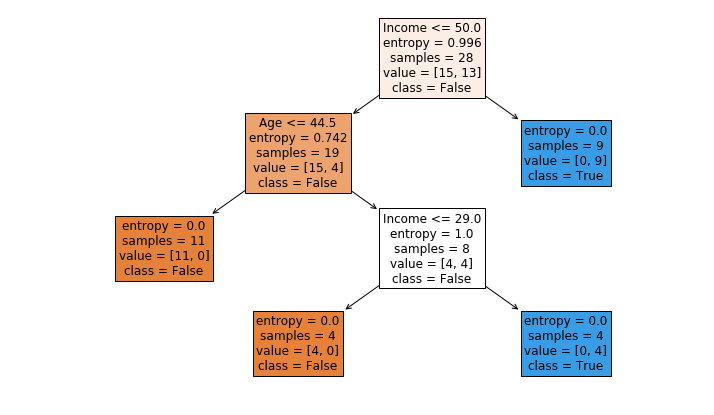

In [266]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42, criterion="entropy",
                             min_samples_split=2, min_samples_leaf=2, 
                             max_depth=50, max_leaf_nodes=50, min_weight_fraction_leaf=.1)
clf.fit(X, y)

clf.predict_proba(suzy)
clf.predict(suzy)

feature_names = ['Age', 'Income']
class_names = [str(x) for x in clf.classes_]

# Needs sklearn 0.21 or higher
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 7));
plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names, proportion=False, fontsize=12);

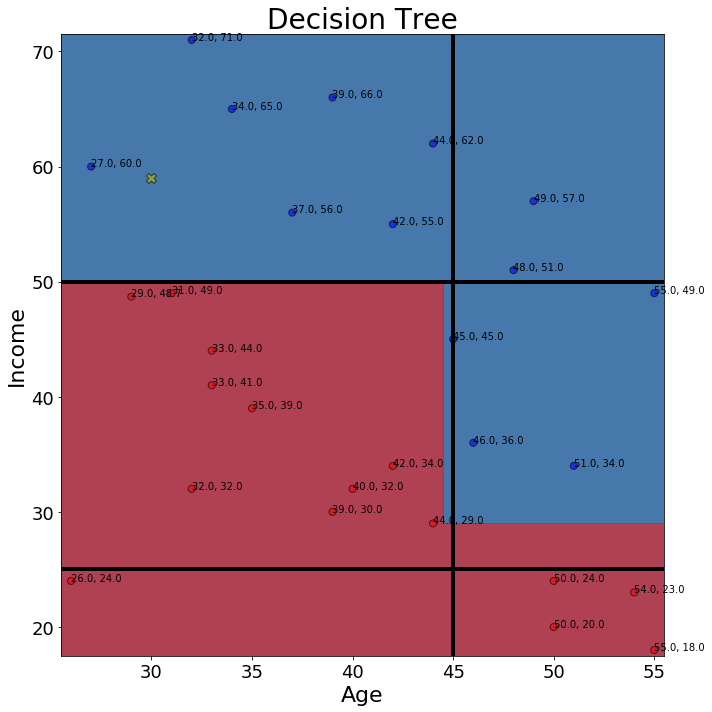

In [274]:
figure = plt.figure(figsize=(10, 10));
ax = plt.subplot(1, 1, 1);
plot_boundaries(X, y, clf, "Decision Tree", ax, hide_ticks=False)
ax.set_xlabel("Age", fontsize=22)
ax.set_ylabel("Income", fontsize=22)
ax.axhline(50, 0, 100, linewidth=4, color='k')
ax.axhline(25, 0, 100, linewidth=4, color='k')
ax.axvline(45, 0, 100, linewidth=4, color='k')
ax.scatter(suzy[:, 0], suzy[:, 1], c='y', marker='X', s=100, edgecolors='k', alpha=0.6);
plt.tight_layout();

# Naive Bayes

In [276]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X, y)
gnb

gnb.predict_proba(suzy)
gnb.predict(suzy)

GaussianNB(priors=None, var_smoothing=1e-09)

array([[0.05333666, 0.94666334]])

array([ True])

## Model Parameters

In [277]:
gnb.theta_ # Mean of each feature per class
gnb.sigma_ # Variance of each feature per class

array([[39.53333333, 32.51333333],
       [42.23076923, 54.38461538]])

array([[ 81.58222245,  93.59582245],
       [ 60.48520732, 115.77514815]])

## Model Visualization

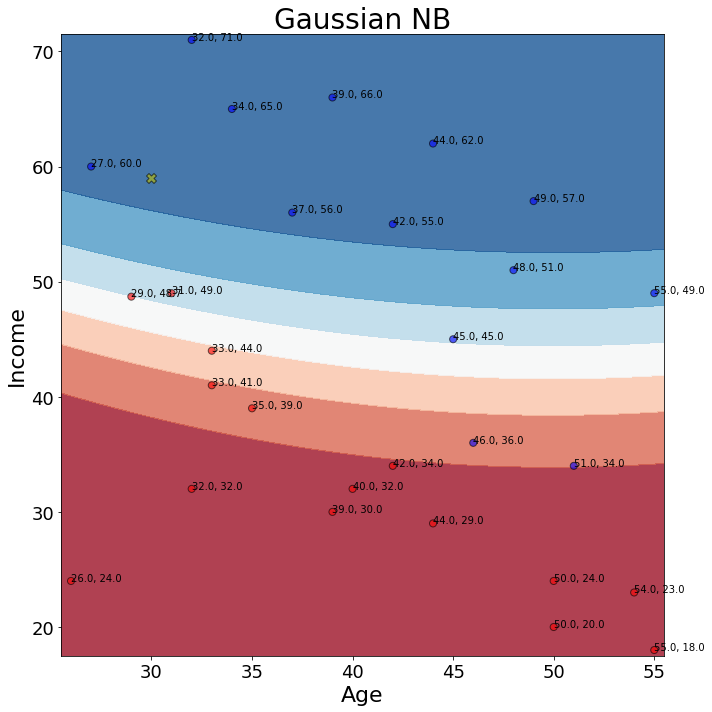

In [278]:
figure = plt.figure(figsize=(10, 10));
ax = plt.subplot(1, 1, 1);
plot_boundaries(X, y, gnb, "Gaussian NB", ax, hide_ticks=False)
ax.set_xlabel("Age", fontsize=22)
ax.set_ylabel("Income", fontsize=22)
ax.scatter(suzy[:, 0], suzy[:, 1], c='y', marker='X', s=100, edgecolors='k', alpha=0.6);
plt.tight_layout();

# KNN

In [269]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X, y)

knn_clf.predict_proba(suzy)
knn_clf.predict(suzy)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

array([[0., 1.]])

array([ True])